In [1]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt

from statcast_batter_analysis import Batter,Game,AtBat
from sklearn.linear_model import LinearRegression

In [2]:
#df = pd.read_csv('Data/2021/Nationals.csv')
df = pd.read_csv('Data/aggregated-data.csv')

In [3]:
df.shape

(826370, 92)

In [4]:
df = df.rename(columns={'events':'event_result','description':'event'})

In [5]:
excluded_events = ['foul_bunt','missed_bunt','hit_by_pitch','bunt_foul_tip']

In [6]:
excluded_results = ['hit_by_pitch','sac_bunt','catcher_interf']

In [7]:
df.shape

(826370, 92)

In [8]:
for event in excluded_events:
    df = df[df['event']!=event]

In [9]:
for result in excluded_results:
    df = df[df['event_result']!=result]

In [10]:
df.shape

(820918, 92)

In [11]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,event_result,event,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-08-27,91.0,-2.21,5.37,"Gregorius, Didi",544369,642203,field_out,hit_into_play,...,0,0,2,2,0,Infield shift,Standard,220.0,-0.006,-0.100
1,FF,2021-08-27,91.5,-2.44,5.25,"Gregorius, Didi",544369,642203,NaN,ball,...,0,0,2,2,0,Infield shift,Standard,225.0,0.000,0.014
2,FF,2021-08-27,90.2,-2.50,5.41,"Gregorius, Didi",544369,642203,NaN,called_strike,...,0,0,2,2,0,Infield shift,Standard,219.0,0.000,-0.019
3,FF,2021-08-27,91.3,-2.50,5.33,"Realmuto, J.T.",592663,642203,field_out,hit_into_play,...,0,0,2,2,0,Standard,Standard,224.0,-0.011,-0.185
4,FF,2021-08-27,90.2,-2.50,5.31,"Realmuto, J.T.",592663,642203,NaN,ball,...,0,0,2,2,0,Standard,Standard,219.0,0.000,0.025


In [12]:
players = df['player_name'].unique()

In [13]:
batters = []
for player in players:
    print(player)
    player_df = df[df['player_name']==player]
    print(player_df.shape)
    batter = Batter(player,player_df)
    
    batters.append(batter)

Gregorius, Didi
(2039, 92)


/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['isStrike'] = (self.data['plate_x'] >= self.sz_left) & (self.data['plate_x'] <= self.sz_right) & (
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['isSwing'] = (self.data['event']=='hit_into_play') | (self.data['event']=='foul') | (
/Users/jacobhow/Documents/statcast-batter-analy

Realmuto, J.T.
(2392, 92)
Harper, Bryce
(2743, 92)
Segura, Jean
(2472, 92)
Herrera, Odúbel
(1413, 92)
Nola, Aaron
(189, 92)
Jankowski, Travis
(585, 92)
Galvis, Freddy
(1718, 92)
Miller, Brad
(1831, 92)
McCutchen, Andrew
(2788, 92)
Bonifacio, Jorge
(385, 92)
Torreyes, Ronald
(888, 92)
Moore, Matt
(75, 92)
Knapp, Andrew
(869, 92)
Williams, Luke
(397, 92)
Wheeler, Zack
(210, 92)
Hoskins, Rhys
(2645, 92)
Suárez, Ranger
(18, 92)
Gibson, Kyle
(50, 92)
Bohm, Alec
(2300, 92)
Moniak, Mickey
(195, 92)
Maton, Nick
(496, 92)
Hammer, JD
(4, 92)
Neris, Héctor
(3, 92)
Marchan, Rafael
(115, 92)
Anderson, Chase
(39, 92)
Velasquez, Vince
(71, 92)
Howard, Spencer
(33, 92)
Eflin, Zach
(117, 92)
Vierling, Matt
(25, 92)
Falter, Bailey
(8, 92)
Joyce, Matt
(837, 92)
Bradley, Archie
(4, 92)
Quinn, Roman
(683, 92)
Kingery, Scott
(540, 92)
Haseley, Adam
(452, 92)
Flores, Wilmer
(2358, 92)
Posey, Buster
(1342, 92)
Ruf, Darin
(1467, 92)
Wade Jr., LaMonte
(1266, 92)
Slater, Austin
(1469, 92)
Gausman, Kevin
(151, 92

(47, 92)
Garrett, Braxton
(36, 92)
Marrero, Deven
(52, 92)
Morimando, Shawn
(7, 92)
Panik, Joe
(1356, 92)
Campbell, Paul
(18, 92)
Hess, David
(14, 92)
Díaz, Lewin
(301, 92)
Rogers, Trevor
(114, 92)
Miller, Brian
(22, 92)
Duvall, Adam
(2487, 92)
Wallach, Chad
(478, 92)
Berti, Jon
(1712, 92)
Holloway, Jordan
(41, 92)
Harrison, Monte
(252, 92)
Cooper, Garrett
(1552, 92)
López, Pablo
(115, 92)
Bender, Anthony
(8, 92)
Okert, Steven
(6, 92)
Detwiler, Ross
(15, 92)
Marté, Luis
(28, 92)
Curtiss, John
(7, 92)
Poteet, Cody
(35, 92)
Pop, Zach
(5, 92)
Dickerson, Corey
(2009, 92)
Devers, José
(172, 92)
Cimber, Adam
(9, 92)
Bleier, Richard
(2, 92)
Castano, Daniel
(10, 92)
Bogaerts, Xander
(3055, 92)
Schwarber, Kyle
(2378, 92)
Muñoz, Yairo
(160, 92)
Araúz, Jonathan
(481, 92)
Duran, Jarren
(358, 92)
Vázquez, Christian
(2392, 92)
Dalbec, Bobby
(1811, 92)
Verdugo, Alex
(2869, 92)
Devers, Rafael
(2934, 92)
Arroyo, Christian
(857, 92)
Martinez, J.D.
(2816, 92)
Hernández, Enrique
(2402, 92)
Renfroe, Hunter

(2748, 92)
Cron, C.J.
(1889, 92)
Blackmon, Charlie
(2540, 92)
Rodgers, Brendan
(1104, 92)
Joe, Connor
(693, 92)
Freeland, Kyle
(77, 92)
Hilliard, Sam
(1078, 92)
Motter, Taylor
(70, 92)
Nuñez, Dom
(924, 92)
Story, Trevor
(2863, 92)
Márquez, Germán
(121, 92)
Senzatela, Antonio
(111, 92)
Gray, Jon
(155, 92)
Trejo, Alan
(182, 92)
Gomber, Austin
(98, 92)
González, Chi Chi
(107, 92)
Daza, Yonathan
(1086, 92)
Tapia, Raimel
(2374, 92)
Goudeau, Ashton
(4, 92)
Fuentes, Joshua
(1366, 92)
Adams, Matt
(347, 92)
Owings, Chris
(349, 92)
Chacín, Jhoulys
(22, 92)
Almonte, Yency
(8, 92)
Castellani, Ryan
(3, 92)
Moncada, Yoán
(3088, 92)
Jiménez, Eloy
(1189, 92)
Abreu, José
(3110, 92)
Robert, Luis
(1437, 92)
Anderson, Tim
(2550, 92)
García, Leury
(1501, 92)
Vaughn, Andrew
(1578, 92)
Grandal, Yasmani
(2028, 92)
Lamb, Jake
(950, 92)
Zavala, Seby
(362, 92)
Goodwin, Brian
(1635, 92)
Collins, Zack
(934, 92)
Mendick, Danny
(1179, 92)
Engel, Adam
(795, 92)
Cease, Dylan
(20, 92)
Rodón, Carlos
(11, 92)
Sheets, Gav

(166, 92)
Navarreto, Brian
(15, 92)
Forsythe, Logan
(150, 92)
Cervelli, Francisco
(218, 92)
Lin, Tzu-Wei
(216, 92)
Puello, César
(34, 92)
Grullón, Deivy
(20, 92)
Kratz, Erik
(118, 92)
Canó, Robinson
(604, 92)
Cordell, Ryan
(33, 92)
Dozier, Brian
(50, 92)
Céspedes, Yoenis
(134, 92)
Núñez, Eduardo
(4, 92)
Huff, Sam
(139, 92)
Dietrich, Derek
(299, 92)
Choo, Shin-Soo
(518, 92)
Apostel, Sherten
(92, 92)
Rivera, Yadiel
(19, 92)
Garcia, Greg
(285, 92)
Hill, Tim
(3, 92)
Adams, Austin
(3, 92)
Oña, Jorge
(63, 92)
Davis, Chris
(219, 92)
Herrera, Dilson
(33, 92)
Smith Jr., Dwight
(286, 92)
Wieters, Matt
(179, 92)
Ravelo, Rangel
(159, 92)
Cron, Kevin
(80, 92)
Flowers, Tyler
(325, 92)
Markakis, Nick
(549, 92)
Hechavarría, Adeiny
(228, 92)
Murphy, Daniel
(486, 92)
Kemp, Matt
(547, 92)
Encarnación, Edwin
(786, 92)
Sánchez, Yolmer
(98, 92)
Goins, Ryan
(40, 92)
Delmonico, Nicky
(96, 92)
Cuthbert, Cheslor
(3, 92)
Kipnis, Jason
(589, 92)
Phegley, Josh
(69, 92)
Joseph, Caleb
(37, 92)
Davidson, Matt
(200, 9

In [14]:
batter.babip_count

30

In [15]:
def sortFunc(x):
    return x.data.shape[0]

batters.sort(reverse=True,key=sortFunc)

In [16]:
results = {}
for batter in batters[:300]:
    print(batter)
    k_rate = batter.calculate_strikeout_rate()
    walk_rate = batter.calculate_walk_rate()
    bb_minus_k_rate = walk_rate - k_rate
    chase_rate = batter.calculate_chase_rate()
    chase_rate_plus = batter.calculate_chase_rate_plus()
    chase_rate_plus_rms = batter.calculate_chase_rate_plus_rms()
    chase_rate_plus_exp = batter.calculate_chase_rate_plus_exp()
    
    contact_rate = batter.calculate_contact_rate()
    zone_contact_rate = batter.calculate_zone_contact_rate()
    outside_contact_rate = batter.calculate_outside_contact_rate()
    
    batter_results = {}
    batter_results['K%'] = k_rate
    batter_results['BB%'] = walk_rate
    batter_results['BB% - K%'] = bb_minus_k_rate
    batter_results['chase rate'] = chase_rate
    batter_results['chase rate plus'] = chase_rate_plus
    batter_results['chase rate plus rms'] = chase_rate_plus_rms
    batter_results['chase rate plus exp'] = chase_rate_plus_exp
    batter_results['contact rate'] = contact_rate
    batter_results['zone contact rate'] = zone_contact_rate
    batter_results['outside contact rate'] = outside_contact_rate
    results[batter.name] = batter_results

Santana, Carlos
Semien, Marcus
Ramírez, José
Goldschmidt, Paul
Olson, Matt
Canha, Mark
Swanson, Dansby
Abreu, José
Hernández, César
Freeman, Freddie
Crawford, J.P.
Moncada, Yoán
Gallo, Joey
Bogaerts, Xander
Merrifield, Whit
Grossman, Robbie
Correa, Carlos
Turner, Trea
Seager, Kyle
Muncy, Max
Suárez, Eugenio
LeMahieu, DJ
Devers, Rafael
Edman, Tommy
Candelario, Jeimer
Taylor, Chris
Verdugo, Alex
Story, Trevor
Guerrero Jr., Vladimir
Polanco, Jorge
Reynolds, Bryan
Chapman, Matt
Aguilar, Jesús
Martinez, J.D.
Frazier, Adam
Soto, Juan
Ohtani, Shohei
Riley, Austin
Lowe, Brandon
McCutchen, Andrew
Escobar, Eduardo
Cronenworth, Jake
McMahon, Ryan
Harper, Bryce
Adames, Willy
Machado, Manny
Grisham, Trent
Alonso, Pete
Schoop, Jonathan
Altuve, Jose
Meadows, Austin
Arenado, Nolan
Kiner-Falefa, Isiah
Rizzo, Anthony
Winker, Jesse
Votto, Joey
Hoskins, Rhys
Yastrzemski, Mike
Happ, Ian
Fletcher, David
Turner, Justin
Gurriel, Yuli
Castellanos, Nick
Soler, Jorge
Mullins, Cedric
Tatis Jr., Fernando
Betts, Mo

In [17]:
df = pd.DataFrame.from_dict(results,orient='index')

In [18]:
df

,K%,BB%,BB% - K%,chase rate,chase rate plus,chase rate plus rms,chase rate plus exp,contact rate,zone contact rate,outside contact rate
"Santana, Carlos",0.159,0.145,-0.014,0.207,0.271,0.278,0.369,0.798,0.857,0.653
"Semien, Marcus",0.216,0.094,-0.122,0.219,0.297,0.309,0.656,0.784,0.863,0.564
"Ramírez, José",0.149,0.102,-0.047,0.248,0.347,0.359,0.539,0.858,0.912,0.751
"Goldschmidt, Paul",0.197,0.110,-0.087,0.260,0.357,0.369,0.519,0.779,0.818,0.698
"Olson, Matt",0.214,0.118,-0.096,0.244,0.323,0.332,0.425,0.751,0.808,0.614
...,...,...,...,...,...,...,...,...,...,...
"Mendick, Danny",0.220,0.084,-0.136,0.270,0.370,0.381,0.518,0.777,0.841,0.653
"Wisdom, Patrick",0.390,0.077,-0.313,0.312,0.454,0.473,0.782,0.609,0.703,0.431
"Sogard, Eric",0.163,0.062,-0.101,0.240,0.331,0.342,0.499,0.911,0.965,0.793
"Jeffers, Ryan",0.336,0.086,-0.250,0.270,0.380,0.395,0.624,0.677,0.772,0.491


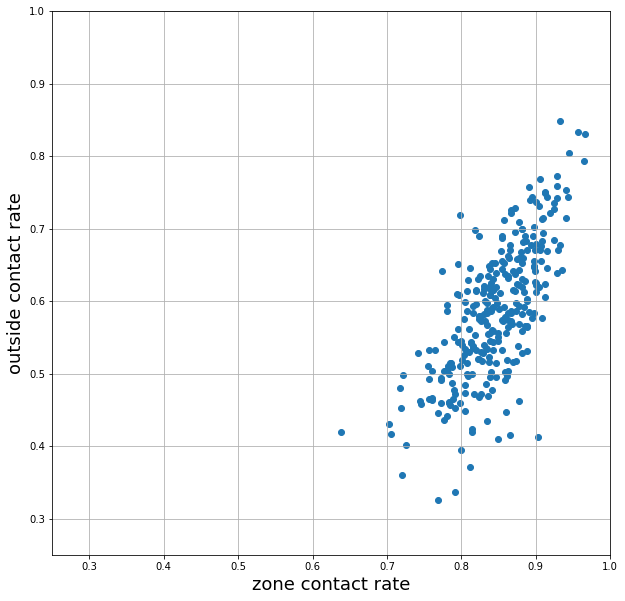

In [19]:
fig,ax = plt.subplots(figsize=(10,10))

x_key = 'zone contact rate'
y_key = 'outside contact rate'
x = df[x_key].values
y = df[y_key].values
ax.scatter(x,y)

axmin = .25
axmax = 1
ax.set_xlim(axmin,axmax)
ax.set_ylim(axmin,axmax)

ax.set_xlabel(x_key,fontsize=18)
ax.set_ylabel(y_key,fontsize=18)

ax.grid()
plt.show()

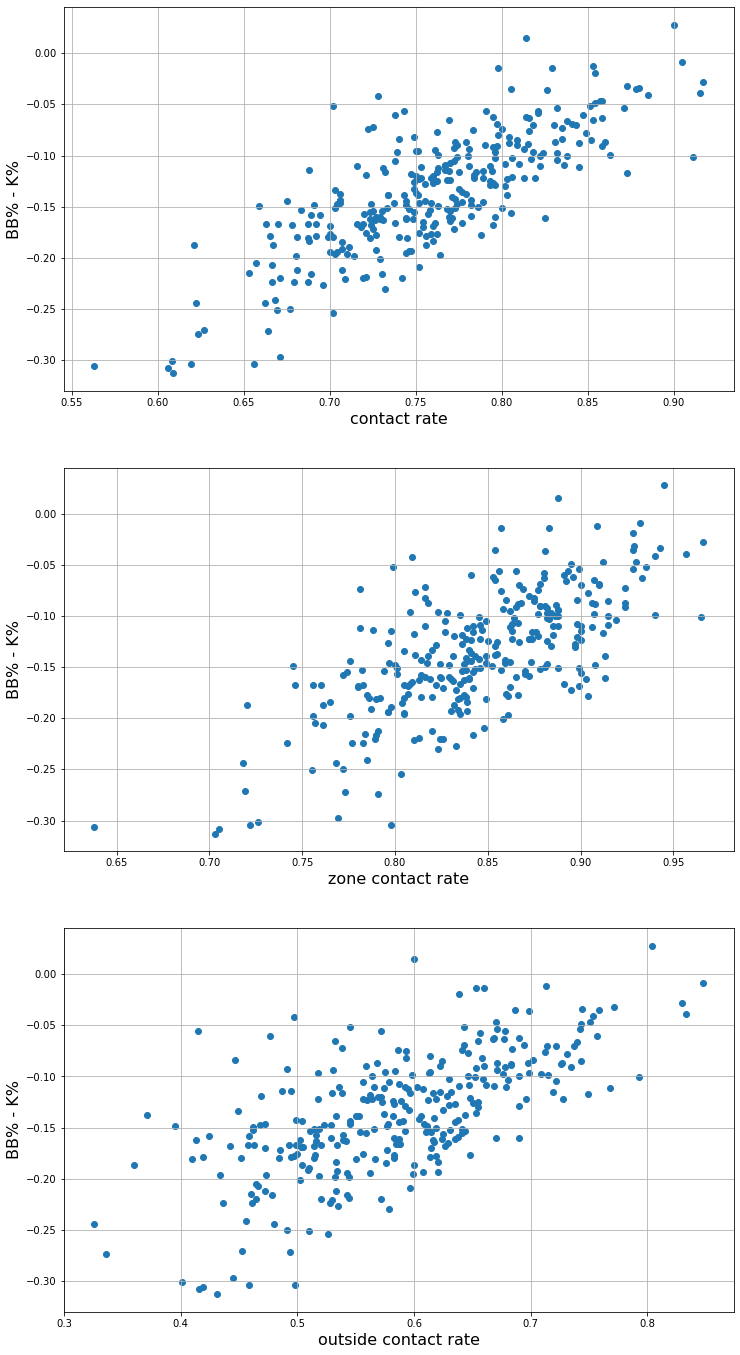

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,24))

x_key = 'contact rate'
y_key = 'BB% - K%'
x = df[x_key].values
y = df[y_key].values
ax1.scatter(x,y)
ax1.set_xlabel(x_key,fontsize=16)

x_key = 'zone contact rate'
y_key = 'BB% - K%'
x = df[x_key].values
y = df[y_key].values
ax2.scatter(x,y)
ax2.set_xlabel(x_key,fontsize=16)

x_key = 'outside contact rate'
y_key = 'BB% - K%'
x = df[x_key].values
y = df[y_key].values
ax3.scatter(x,y)
ax3.set_xlabel(x_key,fontsize=16)

for ax in (ax1,ax2,ax3):
    ax.grid()
    ax.set_ylabel(y_key,fontsize=16)

plt.show()

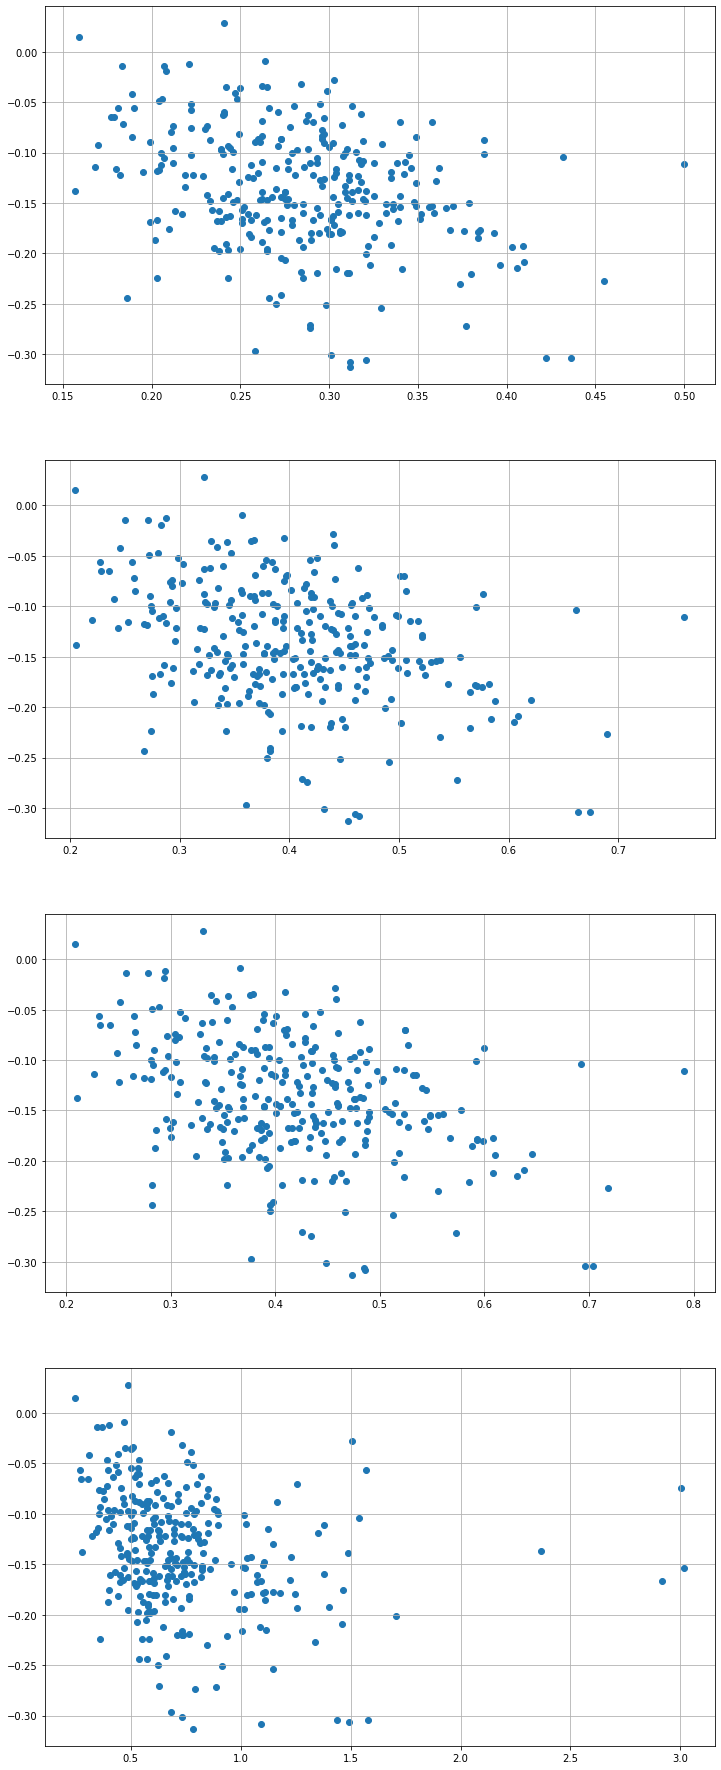

In [21]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,32))

x_key = 'chase rate'
x = df[x_key].values
y = df['BB% - K%'].values
ax1.scatter(x,y)

x_key = 'chase rate plus'
x = df[x_key].values
y = df['BB% - K%'].values
ax2.scatter(x,y)

x_key = 'chase rate plus rms'
x = df[x_key].values
y = df['BB% - K%'].values
ax3.scatter(x,y)

x_key = 'chase rate plus exp'
x = df[x_key].values
y = df['BB% - K%'].values
ax4.scatter(x,y)

for ax in (ax1,ax2,ax3,ax4):
    ax.grid()

plt.show()

In [22]:
### Correlation Evaluation for Chase Metrics

In [23]:
x_key = 'chase rate'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.11590411704216153

In [24]:
x_key = 'chase rate plus'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.13285250450356745

In [25]:
x_key = 'chase rate plus rms'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.13706838255080056

In [26]:
x_key = 'chase rate plus exp'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.05875234975013821

In [27]:
### Correlation Evaluation for Contact Metrics

In [28]:
x_key = 'contact rate'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.6335852997648366

In [29]:
x_key = 'zone contact rate'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.49865685224211187

In [30]:
x_key = 'outside contact rate'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.43844651054907835

### RMSE for Naive Prediction

In [31]:
group_mean = df['BB% - K%'].mean()
group_mean

-0.13652999999999996

In [32]:
group_values = df['BB% - K%'].values

In [33]:
naive_rmse = np.sqrt(((group_values - group_mean)**2).mean())
naive_rmse

0.05983713256276017

### RMSE for Chase Rate Prediction

In [34]:
x_key = 'chase rate'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)

predicted_values = reg.predict(x)

rmse = np.sqrt(((group_values - predicted_values)**2).mean())
print(rmse)

0.056262685487922307


In [35]:
x_key = 'chase rate plus'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)

predicted_values = reg.predict(x)

rmse = np.sqrt(((group_values - predicted_values)**2).mean())
print(rmse)

0.055720789430283316


In [36]:
x_key = 'chase rate plus rms'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)

predicted_values = reg.predict(x)

rmse = np.sqrt(((group_values - predicted_values)**2).mean())
print(rmse)

0.0555851733598518


In [37]:
x_key = 'chase rate plus exp'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)

predicted_values = reg.predict(x)

rmse = np.sqrt(((group_values - predicted_values)**2).mean())
print(rmse)

0.05805274047911871


In [38]:
disciple_variables = ['chase rate','chase rate plus','chase rate plus rms','chase rate plus exp']
contact_variables = ['contact rate','zone contact rate','outside contact rate']

In [ ]:
for dv in disciple_variables:
    for cv in contact_variables:
        x_keys = [dv,cv]
        y_key = 'BB% - K%'
        x = df[x_keys].values
        y = df[y_key].values

        reg = LinearRegression().fit(x, y)
        score = reg.score(x, y)
        
        print(f'{dv} + {cv} - score: {score:.3f}')

In [44]:
for dv in disciple_variables:
    x_key = dv
    y_key = 'BB% - K%'
    x = df[x_keys].values
    contact_rates = df['contact rate'].values
    y = df[y_key].values / contact_rates

    reg = LinearRegression().fit(x, y)
    score = reg.score(x, y)

    print(f'{dv} + {cv} - score: {score:.3f}')

chase rate + outside contact rate - score: 0.533
chase rate plus + outside contact rate - score: 0.533
chase rate plus rms + outside contact rate - score: 0.533
chase rate plus exp + outside contact rate - score: 0.533


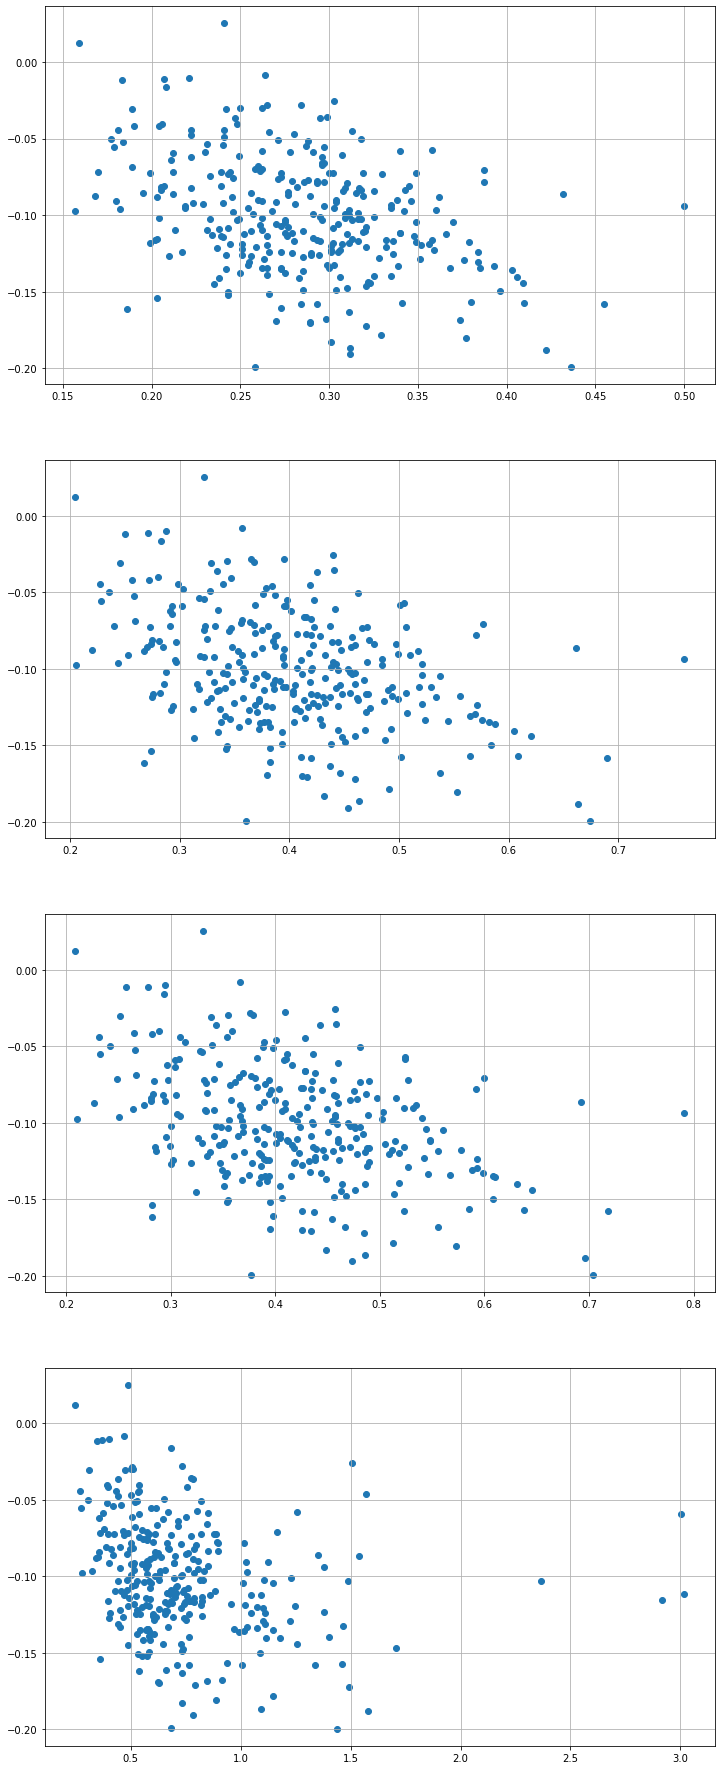

In [42]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,32))

contact_rates = df['contact rate'].values

x_key = 'chase rate'
x = df[x_key].values
y = df['BB% - K%'].values * contact_rates
ax1.scatter(x,y)

x_key = 'chase rate plus'
x = df[x_key].values
y = df['BB% - K%'].values * contact_rates
ax2.scatter(x,y)

x_key = 'chase rate plus rms'
x = df[x_key].values
y = df['BB% - K%'].values * contact_rates
ax3.scatter(x,y)

x_key = 'chase rate plus exp'
x = df[x_key].values
y = df['BB% - K%'].values * contact_rates
ax4.scatter(x,y)

for ax in (ax1,ax2,ax3,ax4):
    ax.grid()

plt.show()